# Improving the Basic Neural Network

In this notebook, I improve the performance of the basic network from `basic_network.ipynb`.
I use the same overall architecture (1 hidden layer of 30 neurons) with the following improvements:
- Leaky ReLU activation function
- Improved weight initialization
- Weight regularization (weight decay)
- Softmax output layer
- Cross-entropy loss

This significantly improves the performance of the network on both the MNIST and Fashion MNIST datasets.
The network is able to achieve 96.5% accuracy on MNIST and 85.6% accuracy on Fashion MNIST.
These improved measurements only represent a 1.9% and 0.5% increase respectively, but these are actually significant improvements.
Out of all the misclassified MNIST examples, over 35% of them were correctly classified with the improved network.
Similarly, 3% of the previously misclassified Fashion MNIST images were correctly classified.

## Load MNIST data

In [1]:
from typing import *
import numpy as np
from matplotlib import pyplot as plt
from data_loader import load_data

In [2]:
np.set_printoptions(suppress=True, precision=2)
np.random.seed(1)

In [3]:
# Could take 10 to 20 seconds
train_images, train_labels, test_images, test_labels = load_data("mnist")

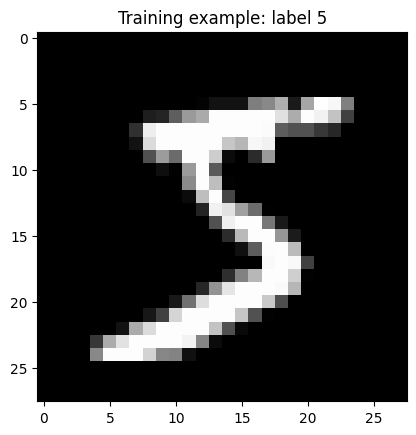

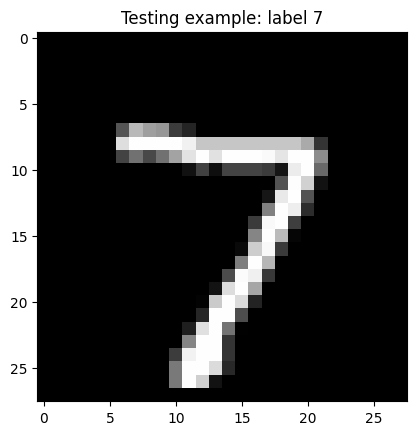

In [4]:
image, label = train_images[0], train_labels[0]
plt.imshow(image, interpolation="nearest", cmap='gray')
plt.title("Training example: label " + str(np.argmax(label)))
plt.show()

image, label = test_images[0], test_labels[0]
plt.imshow(image, interpolation="nearest", cmap='gray')
plt.title("Testing example: label " + str(label))
plt.show()

#### Flatten images & collect into tuples

In [5]:
training_data = [(x.flatten(), y) for x, y in zip(train_images, train_labels)]
testing_data = [(x.flatten(), y) for x, y in zip(test_images, test_labels)]

## Initialize the network

In [6]:
from network import *
from layers import *
from loss import *

In [7]:
layers = [
    Dense(784, 30, regularization_parameter=5),
    LeakyReLU(30, 0.1),
    Dense(30, 10, regularization_parameter=5),
    LeakyReLU(10, 0.1),
    Softmax(10)
]

network = Network(
    layers,
    learning_rate=0.02,
    mini_batch_size=10
)

### Feed forward with random parameters

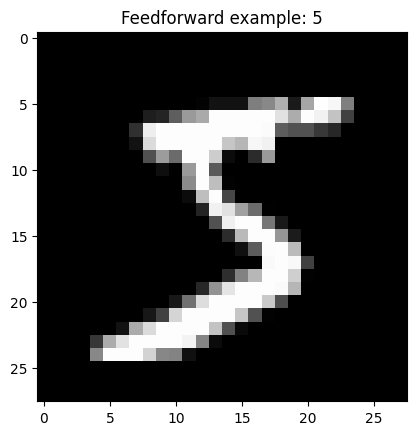

Network output: [0.02 0.02 0.11 0.03 0.03 0.11 0.47 0.05 0.08 0.07]


In [8]:
# network.reset()
image, label = training_data[0]

plt.imshow(image.reshape((28, 28)), interpolation="nearest", cmap='gray')
plt.title("Feedforward example: " + str(np.argmax(label)))
plt.show()
network.set_training(False)
print("Network output:", network.forward(image))

As expected, the network outputs 10 random numbers from 0 to 1.

## Train the network on MNIST

In [9]:
network.reset()
# Setting training to false speeds up forward passes, as the network does not
# have store information necessary for backpropagation.
network.set_training(True)

# The testing accuracy on Epoch 0 should be ~10% when correctly initialized.
correct = network.evaluate(testing_data)
percent = round(correct / 100, 1)
print(f"Epoch 0: {correct} / 10000 ({percent}%)")

network.train(
    epochs=30,
    training_data=training_data, 
    loss=NLL(),
    test_data=testing_data
)

Epoch 0: 1009 / 10000 (10.1%)
Epoch 1: 9216 / 10000 (92.2%)
Epoch 2: 9366 / 10000 (93.7%)
Epoch 3: 9432 / 10000 (94.3%)
Epoch 4: 9510 / 10000 (95.1%)
Epoch 5: 9505 / 10000 (95.0%)
Epoch 6: 9573 / 10000 (95.7%)
Epoch 7: 9565 / 10000 (95.7%)
Epoch 8: 9559 / 10000 (95.6%)
Epoch 9: 9583 / 10000 (95.8%)
Epoch 10: 9580 / 10000 (95.8%)
Epoch 11: 9606 / 10000 (96.1%)
Epoch 12: 9624 / 10000 (96.2%)
Epoch 13: 9636 / 10000 (96.4%)
Epoch 14: 9629 / 10000 (96.3%)
Epoch 15: 9628 / 10000 (96.3%)
Epoch 16: 9658 / 10000 (96.6%)
Epoch 17: 9626 / 10000 (96.3%)
Epoch 18: 9627 / 10000 (96.3%)
Epoch 19: 9652 / 10000 (96.5%)
Epoch 20: 9645 / 10000 (96.5%)
Epoch 21: 9631 / 10000 (96.3%)
Epoch 22: 9656 / 10000 (96.6%)
Epoch 23: 9636 / 10000 (96.4%)
Epoch 24: 9608 / 10000 (96.1%)
Epoch 25: 9631 / 10000 (96.3%)
Epoch 26: 9637 / 10000 (96.4%)
Epoch 27: 9640 / 10000 (96.4%)
Epoch 28: 9631 / 10000 (96.3%)
Epoch 29: 9619 / 10000 (96.2%)
Epoch 30: 9652 / 10000 (96.5%)


The improved network achieves a test accuracy of 96.6% on epoch 16.

### Visualize weights

The weights are visualized below in a similar manner to the basic network.

Actually, I initially used the standard ReLU activation function, but around half the neurons would die since there is no gradient once a some logit goes negative.
This was easily visualized using the images below, as around half the images would just be random noise.
The LeakyReLU fixes this issue by introducing a small gradient below 0, contributing to around a 1% increase in test accuracy.

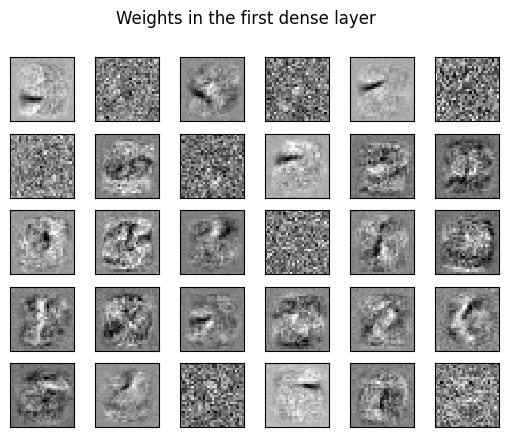

In [10]:
fig, axes = plt.subplots(5, 6)
fig.suptitle("Weights in the first dense layer")
for i in range(30):
    ax = axes[i // 6, i % 6]
    im = network.layers[0].weights[i].reshape(28, 28)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(im, interpolation="nearest", cmap="gray")

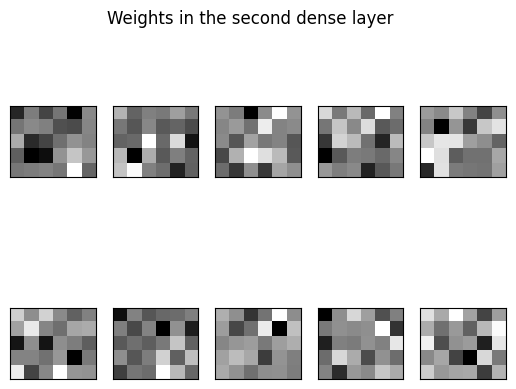

In [11]:
fig, axes = plt.subplots(2, 5)
fig.suptitle("Weights in the second dense layer")
for i in range(10):
    ax = axes[i // 5, i % 5]
    im = network.layers[2].weights[i].reshape(5, 6)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(im, interpolation="nearest", cmap="gray")

### Test the Network on My Handwriting

The following code tests the model's performance on my own handwriting.

In [12]:
from matplotlib.image import imread

In [13]:
images = []
for i in range(10):
    image = imread("my_handwriting/" + str(i) + ".jpg")
    # Convert image to grayscale
    image = (0.2989*image[:,:,0] + 0.5870*image[:,:,1] + 0.1140*image[:,:,2])
    image /= 256
    images.append(image)

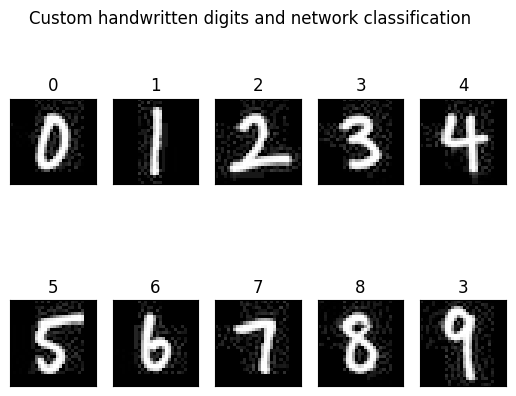

In [14]:
network.set_training(False)

fig, axes = plt.subplots(2, 5)
fig.suptitle("Custom handwritten digits and network classification")
for i in range(10):
    ax = axes[i // 5, i % 5]
    im = images[i]
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(im, interpolation="nearest", cmap="gray")
    ax.set_title(str(np.argmax(network.forward(im.flatten()))))

plt.show()

The network correctly classifies most of my handwritten digits. The extra noise in my images may have lowered the accuracy slightly.

## Load Fashion MNIST data

In [15]:
# Could take 10 to 20 seconds
train_images, train_labels, test_images, test_labels = load_data("fashion_mnist")

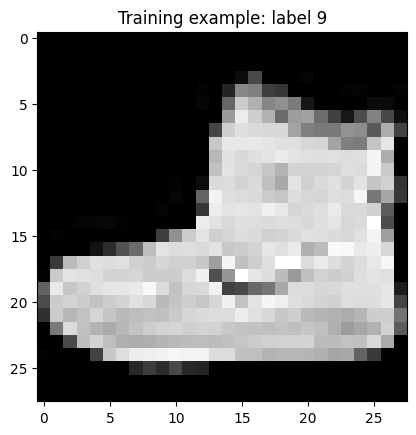

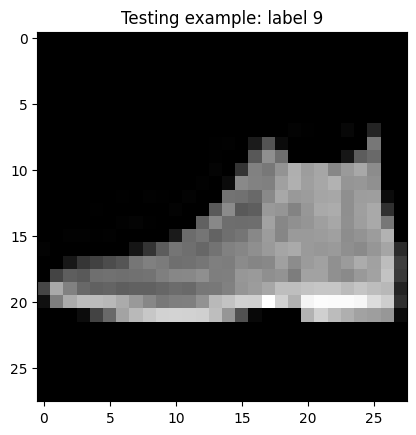

In [16]:
image, label = train_images[0], train_labels[0]
plt.imshow(image, interpolation="nearest", cmap='gray')
plt.title("Training example: label " + str(np.argmax(label)))
plt.show()

image, label = test_images[0], test_labels[0]
plt.imshow(image, interpolation="nearest", cmap='gray')
plt.title("Testing example: label " + str(label))
plt.show()

#### Flatten images & collect into tuples

In [17]:
training_data = [(x.flatten(), y) for x, y in zip(train_images, train_labels)]
testing_data = [(x.flatten(), y) for x, y in zip(test_images, test_labels)]

## Train the network on Fashion MNIST

In [18]:
network.reset()
network.set_training(True)

# The testing accuracy on Epoch 0 should be ~10% when correctly initialized.
correct = network.evaluate(testing_data)
percent = round(correct / 100, 1)
print(f"Epoch 0: {correct} / 10000 ({percent}%)")

# Training for more epochs will yield better results.
# This example is just meant to demonstrate the network is able to learn
# correctly.
network.train(
    epochs=30,
    training_data=training_data, 
    loss=MSE(),
    test_data=testing_data
)

Epoch 0: 1056 / 10000 (10.6%)
Epoch 1: 8253 / 10000 (82.5%)
Epoch 2: 8356 / 10000 (83.6%)
Epoch 3: 8466 / 10000 (84.7%)
Epoch 4: 8519 / 10000 (85.2%)
Epoch 5: 8507 / 10000 (85.1%)
Epoch 6: 8551 / 10000 (85.5%)
Epoch 7: 8569 / 10000 (85.7%)
Epoch 8: 8631 / 10000 (86.3%)
Epoch 9: 8552 / 10000 (85.5%)
Epoch 10: 8575 / 10000 (85.8%)
Epoch 11: 8652 / 10000 (86.5%)
Epoch 12: 8642 / 10000 (86.4%)
Epoch 13: 8657 / 10000 (86.6%)
Epoch 14: 8608 / 10000 (86.1%)
Epoch 15: 8657 / 10000 (86.6%)
Epoch 16: 8666 / 10000 (86.7%)
Epoch 17: 8617 / 10000 (86.2%)
Epoch 18: 8727 / 10000 (87.3%)
Epoch 19: 8652 / 10000 (86.5%)
Epoch 20: 8631 / 10000 (86.3%)
Epoch 21: 8726 / 10000 (87.3%)
Epoch 22: 8673 / 10000 (86.7%)
Epoch 23: 8647 / 10000 (86.5%)
Epoch 24: 8657 / 10000 (86.6%)
Epoch 25: 8682 / 10000 (86.8%)
Epoch 26: 8667 / 10000 (86.7%)
Epoch 27: 8711 / 10000 (87.1%)
Epoch 28: 8709 / 10000 (87.1%)
Epoch 29: 8721 / 10000 (87.2%)
Epoch 30: 8662 / 10000 (86.6%)


The improved network achieves a test accuracy of 87.3% on epoch 18.

### Visualize weights

The weights are visualized similar to the MNIST example. Again, we can see the network has learned some interesting visual features.

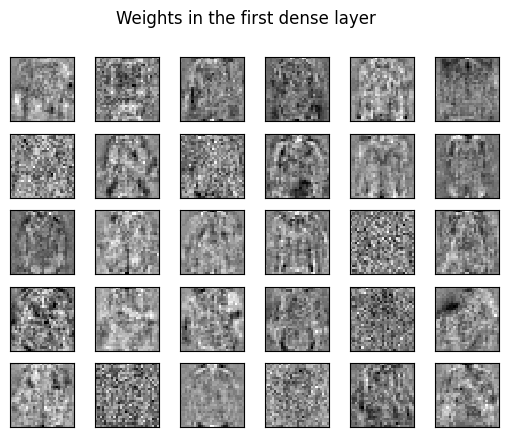

In [19]:
fig, axes = plt.subplots(5, 6)
fig.suptitle("Weights in the first dense layer")
for i in range(30):
    ax = axes[i // 6, i % 6]
    im = network.layers[0].weights[i].reshape(28, 28)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(im, interpolation="nearest", cmap="gray")

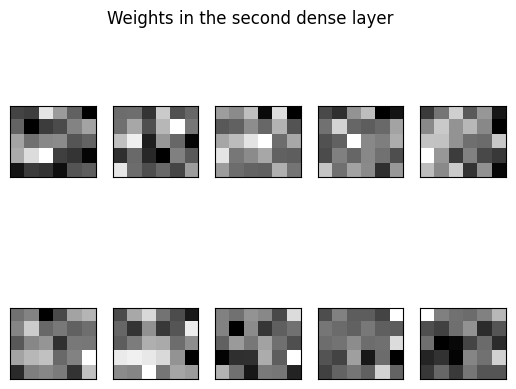

In [20]:
fig, axes = plt.subplots(2, 5)
fig.suptitle("Weights in the second dense layer")
for i in range(10):
    ax = axes[i // 5, i % 5]
    im = network.layers[2].weights[i].reshape(5, 6)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(im, interpolation="nearest", cmap="gray")